In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.python.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau,
                                        TensorBoard)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Input, BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Model

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/archive (4).zip'

In [ ]:
extract_path = '/content/data/'

os.makedirs(extract_path, exist_ok=True)

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
log_dir = './log'
train_dataset_path = r"/content/data/data/train"
val_dataset_path = r'/content/data/data/val'
test_dataset_path = r"/content/data/data/test"
batch_size = 128

lr = 1e-3

num_classes = 7
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range = 10,
        zoom_range = 0.1,
        horizontal_flip = True
       )

train_generator = train_datagen.flow_from_directory(
        directory=train_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        batch_size=batch_size,
        class_mode="categorical",
        shuffle=True,
        seed=42
    )
test_datagen = ImageDataGenerator(
        rescale=1 / 255.0,)

valid_generator = test_datagen.flow_from_directory(

        directory=val_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=42
    )
test_gen = test_datagen.flow_from_directory(
        directory=test_dataset_path,
        target_size=(48, 48),
        color_mode="grayscale",
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=True,
        seed=42
    )

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:
def create_model(input_shape=(48,48,1), num_classes=7):

    input = Input(shape=input_shape)
    x = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(input)

    x = Conv2D(filters=512, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)

    #
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(filters=192, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Flatten()(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)

    x = Dropout(0.3)(x)
    x = Dense(num_classes, activation='softmax')(x)

    return Model(input, x, name='fer_model')

In [ ]:
# Your model, adjust model parameters accordingly
num_classes=7
model = create_model(num_classes=num_classes)

In [ ]:
model.summary()

Model: "fer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 256)       2560      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 512)       1180160   
                                                                 
 batch_normalization (Batch  (None, 48, 48, 512)       2048      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 512)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 512)       0 

In [ ]:
epochs=25
training_weights = './weights'
checkpoint_period = ModelCheckpoint(training_weights + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
                                        monitor='val_loss', save_weights_only=True, save_best_only=False, period=1)

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)
tensorboard = TensorBoard(log_dir=log_dir)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(loss=tf.keras.losses.categorical_crossentropy, metrics='acc', optimizer=optimizer)
history1 = model.fit(train_generator, validation_data=valid_generator,
                       epochs=epochs, callbacks=[tensorboard, early_stopping, checkpoint_period]
                       )
model.evaluate(test_gen, verbose=1)
model.save('/content/drive/MyDrive/hypara2.h5')

Epoch 1/25
225/225 [==============================] - 95s 403ms/step - loss: 0.7804 - acc: 0.7062 - val_loss: 0.9852 - val_acc: 0.6489
Epoch 2/25
225/225 [==============================] - 90s 400ms/step - loss: 0.7774 - acc: 0.7095 - val_loss: 0.9811 - val_acc: 0.6562
Epoch 3/25
225/225 [==============================] - 93s 411ms/step - loss: 0.7715 - acc: 0.7086 - val_loss: 0.9798 - val_acc: 0.6492
Epoch 4/25
225/225 [==============================] - 92s 410ms/step - loss: 0.7667 - acc: 0.7132 - val_loss: 0.9905 - val_acc: 0.6553
Epoch 5/25
225/225 [==============================] - 95s 423ms/step - loss: 0.7583 - acc: 0.7136 - val_loss: 0.9644 - val_acc: 0.6690
Epoch 6/25
225/225 [==============================] - 90s 400ms/step - loss: 0.7604 - acc: 0.7144 - val_loss: 0.9790 - val_acc: 0.6517
Epoch 7/25
225/225 [==============================] - 90s 400ms/step - loss: 0.7519 - acc: 0.7202 - val_loss: 0.9792 - val_acc: 0.6617
Epoch 8/25
225/225 [==============================] - 9

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


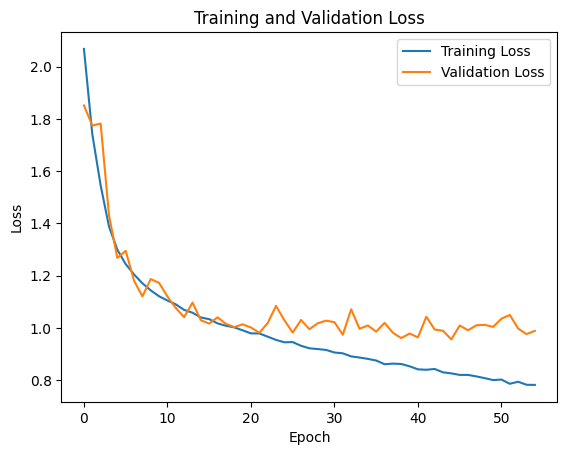

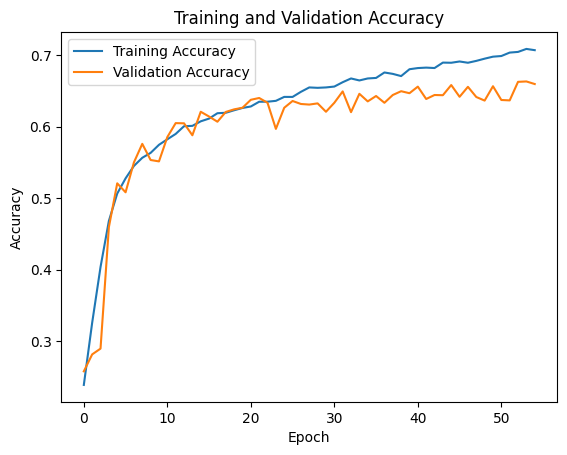

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

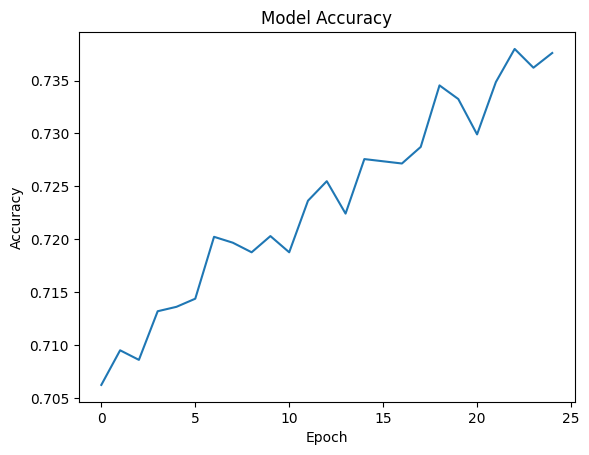

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the training history dictionary
accuracy = history1.history['acc']  # or history.history['acc']

# Plot accuracy over epochs
plt.plot(accuracy)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()



In [ ]:
final_accuracy = accuracy[-1]
print("Final Accuracy:", final_accuracy)


Final Accuracy: 0.7376084327697754


In [ ]:
# Save history to Google Drive
with open('/content/drive/My Drive/training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
# Save history to Google Drive
with open('/content/drive/My Drive/training_history1.pkl', 'wb') as file:
    pickle.dump(history1.history, file)

In [ ]:
with open('/content/drive/My Drive/training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/training_history.pkl'

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the training history dictionary
accuracy = loaded_history['acc']  # or history.history['acc']

# Plot accuracy over epochs
plt.plot(accuracy)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
# Assuming 'history' is the training history dictionary
accuracy = history['acc']  # or history.history['acc']

# Plot accuracy over epochs
plt.plot(accuracy)
plt.title('Model Accuracy1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
model = load_model('/content/drive/MyDrive/hypara2.h5')

1/1 [==============================] - 0s 20ms/step


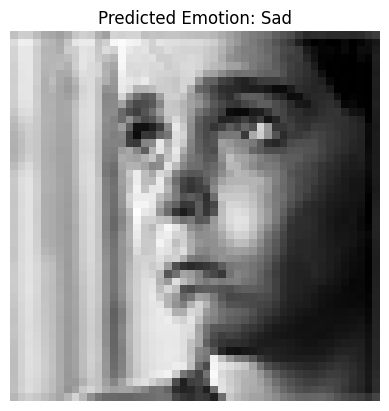

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(48, 48), grayscale=True)
    image_array = img_to_array(image)
    image_array /= 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

image_path = '33549.png'

preprocessed_image = preprocess_image(image_path)


predictions = model.predict(preprocessed_image)[0]


emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


predicted_emotion = emotion_labels[np.argmax(predictions)]


image = load_img(image_path)
plt.imshow(image)
plt.title(f'Predicted Emotion: {predicted_emotion}')
plt.axis('off')
plt.show()